# Logistic regression modeling and interpretation using Yelp reviews

### Objective: 

- Checking and removing the outliers from a linear regression model using Cook's distance
- Visualizing the error distribution using a Q-Q plot
- Presenting final regression model performance including r-squared value

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels import graphics
from patsy import dmatrices
import sys
from sklearn import metrics

try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)
plt.rcParams['figure.figsize'] = [15, 10]

C:\Users\ML\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Read data

In [2]:
reviews = pd.read_csv('data/ready_data.csv')

y = reviews['Recommended']
X = reviews.copy()
del X['Recommended']

# Logistic Regression

In [3]:
model = sm.Logit(endog=y, exog=X, missing='raise').fit()
y_pred_proba = model.predict(X)
model.summary2()

Optimization terminated successfully.
         Current function value: 0.485899
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 No. Iterations:        7.0000    
Dependent Variable:       Recommended           Pseudo R-squared:      0.299     
Date:                     2018-06-21 12:36      AIC:                   51857.0621
No. Observations:         53292                 BIC:                   52159.1025
Df Model:                 33                    Log-Likelihood:        -25895.   
Df Residuals:             53258                 LL-Null:               -36939.   
Converged:                1.0000                Scale:                 1.0000    
---------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Profile_Pic_Bool                0.1442   0.0255   5.6660 0.0000   0.0943   0.1941
User_Rating                     0.8715   0.1069   8.1547 0.0000   0.6620   1.0809
Rev_Avg_Sentiment              -7.1810   0.2935 -24.4701 0.0000  -7.7561  -6.6058
spellErrorRatio                 0.4731   0.3008   1.5727 0.1158  -0.1165   1.0628
TB_polarity                    -0.8604   0.1194  -7.2042 0.0000  -1.0945  -0.6263
TB_subjectivity                 0.4138   0.0790   5.2407 0.0000   0.2591   0.5686
toxic                          -0.2484   0.2199  -1.1295 0.2587  -0.6793   0.1826
severe_toxic                  -12.0781   4.5941  -2.6290 0.0086 -21.0825  -3.0738
obscene                         0.2548   0.4512   0.5647 0.5723  -0.6296   1.1391
threat                          1.1904   1.8821   0.6325 0.5271  -2.4984   4.8792
insult                         -0.3155   0.7310  -0.4316 0.6660  -1.7482   1.1172
identity_hate                  -1.4037   1.5258  -0.9200 0.3576  -4.3943   1.5868
readability_FK                 -5.2617   4.6283  -1.1368 0.2556 -14.3330   3.8097
readability_AR                 -1.5351   1.6450  -0.9332 0.3507  -4.7592   1.6891
spam                            0.1343   0.0676   1.9849 0.0472   0.0017   0.2668
Rev_V_Negative                  0.0956   0.0486   1.9662 0.0493   0.0003   0.1908
Rev_V_Positive                  0.0604   0.0284   2.1264 0.0335   0.0047   0.1161
Edited_Review_Bool             -0.7260   0.0694 -10.4616 0.0000  -0.8620  -0.5900
Yelp_Rest_Order                -0.0148   0.0470  -0.3156 0.7523  -0.1069   0.0773
Ratio_Recommended              -1.4566   0.0792 -18.3913 0.0000  -1.6119  -1.3014
Rest_Address_Words             -0.1053   0.0866  -1.2168 0.2237  -0.2749   0.0643
Rest_Name_Words                -0.1938   0.0718  -2.6981 0.0070  -0.3345  -0.0530
User_Rating_Diff               -2.3308   0.2089 -11.1554 0.0000  -2.7403  -1.9213
Friends_Log                     1.1032   0.0546  20.2115 0.0000   0.9962   1.2102
Days_Since_10_2004_Log          1.5959   0.1171  13.6324 0.0000   1.3664   1.8253
Review_Sentence_Log           -23.9032   0.9377 -25.4925 0.0000 -25.7410 -22.0655
Tot_Photos_Log                  1.3824   0.1111  12.4387 0.0000   1.1646   1.6002
User_Tot_Reviews_Log            6.0363   0.1015  59.4875 0.0000   5.8374   6.2352
Rev_Tot_Sentiment_Log          22.5160   0.9297  24.2177 0.0000  20.6938  24.3383
Tot_Rest_Reviews_Log           -0.9739   0.0690 -14.1098 0.0000  -1.1092  -0.8386
Tot_Rest_In_City_Log           -0.6903   0.1023  -6.7446 0.0000  -0.8909  -0.4897
Review_Words_Log                0.8313   0.5966   1.3934 0.1635  -0.3380   2.0007
Review_Words_No_Stopwords_Log   4.9854   0.6509   7.6587 0.0000   3.7096   6.2612
Rev_Dist_Miles_Log              0.7078   0.0474  14.9185 0.0000   0.6148   0.8007
=================================================================================

"""

# ROC curve

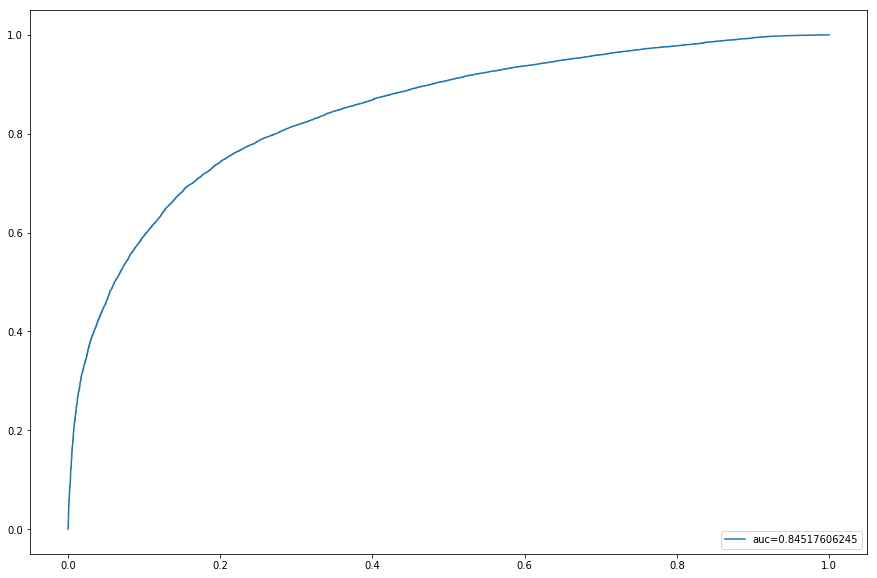

In [4]:
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)

# Choose a threshold value

In [5]:
threshold = .5
y_pred = (y_pred_proba > threshold).astype(int)

In [6]:
print('Accuracy Score:', metrics.accuracy_score(y, y_pred))
print('-'*50)
print('F1 Score:', metrics.f1_score(y, y_pred))
print('-'*50)
print('Precision:', metrics.precision_score(y, y_pred))
print('-'*50)
print('Recall:', metrics.recall_score(y, y_pred))
print('-'*50)
confusion_matrix = pd.DataFrame(
    metrics.confusion_matrix(y, y_pred),
    columns=['Predicted True', 'Predicted False'],
    index=['Actual True', 'Actual False']
)
confusion_matrix

Accuracy Score: 0.771147639421
--------------------------------------------------
F1 Score: 0.762205584152
--------------------------------------------------
Precision: 0.793198604009
--------------------------------------------------
Recall: 0.73354349621
--------------------------------------------------


,Predicted True,Predicted False
Actual True,21550,5096
Actual False,7100,19546


# Coefficient plot on scaled features linear Regression

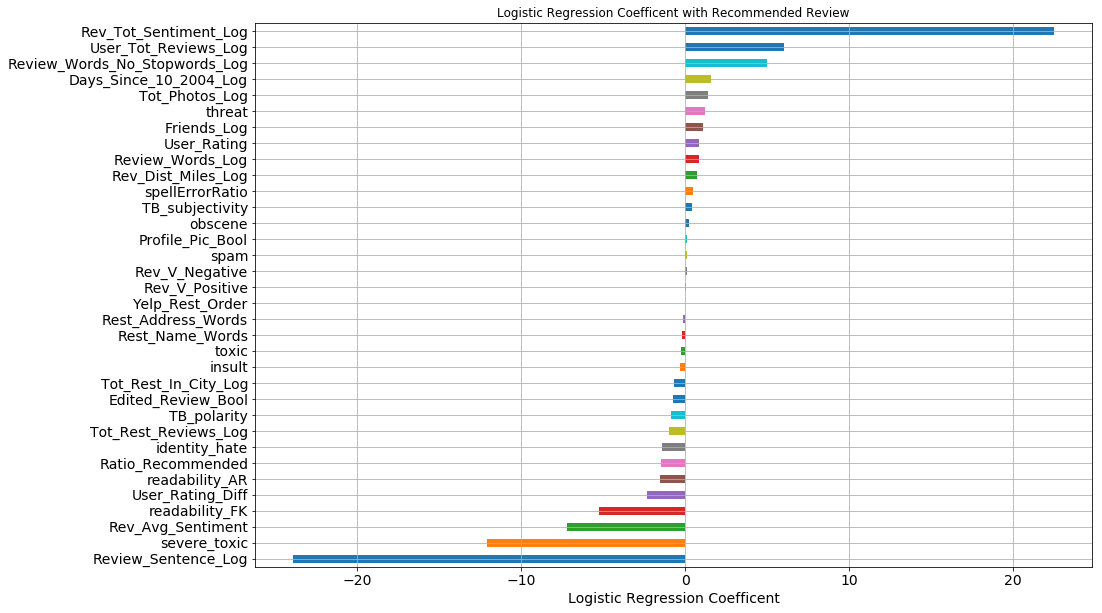

In [7]:
plt.figure(figsize = (15,10))
model.params[~model.params.index.isin(['Intercept'])].sort_values().plot(kind = 'barh', grid = 1, 
                                        title ='Logistic Regression Coefficent with Recommended Review')

plt.xlabel('Logistic Regression Coefficent', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# <span style="color:blue">   Interpretation of model coefficients

## For the feature that is not log-transformed:
- Run 'Scale back' calculation using a value between 0 and 1, and get the feeling of the original value range
- Run 'Scale value' twice using reasonable values based on the previous step.  Double the amount of input values and tell how much the change of being 'regular' increased or decreased.

## For the feature that is log-transformed:
- Run 'Scale back' calculation using the correspondig coefficient value for a feature
- Say that multiplying the feature by 'e' increase the chance of 'regular' being 1 by the 'scale back' value.

### TBD:   type interpretation here once the final model is determined

# Read data again, with insignificant features removed

In [8]:
reviews = pd.read_csv('data/ready_data.csv')

#remove features if p value greater than 0.05
y = reviews['Recommended']
X = reviews.copy()
X.drop(columns=['Recommended','Rest_Name_Words','Rest_Address_Words','Yelp_Rest_Order','Rev_V_Negative','Rev_V_Positive',
               'obscene', 'insult', 'Review_Words_Log', 'threat', 'readability_FK', 'identity_hate', 'toxic', 'readability_AR', 'spellErrorRatio'], inplace=True)

# Logistic Regression

In [9]:
model = sm.Logit(endog=y, exog=X, missing='raise').fit()
y_pred_proba = model.predict(X)
model.summary2()

Optimization terminated successfully.
         Current function value: 0.486315
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 No. Iterations:        7.0000    
Dependent Variable:       Recommended           Pseudo R-squared:      0.298     
Date:                     2018-06-21 12:36      AIC:                   51873.4083
No. Observations:         53292                 BIC:                   52051.0791
Df Model:                 19                    Log-Likelihood:        -25917.   
Df Residuals:             53272                 LL-Null:               -36939.   
Converged:                1.0000                Scale:                 1.0000    
---------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------------
Profile_Pic_Bool                0.1440   0.0254   5.6649 0.0000   0.0942   0.1939
User_Rating                     0.8893   0.1038   8.5646 0.0000   0.6858   1.0928
Rev_Avg_Sentiment              -7.2788   0.2816 -25.8435 0.0000  -7.8308  -6.7268
TB_polarity                    -0.8572   0.1180  -7.2674 0.0000  -1.0884  -0.6260
TB_subjectivity                 0.3771   0.0778   4.8498 0.0000   0.2247   0.5295
severe_toxic                  -14.8663   4.1270  -3.6022 0.0003 -22.9550  -6.7775
spam                            0.0936   0.0663   1.4124 0.1578  -0.0363   0.2235
Edited_Review_Bool             -0.7281   0.0691 -10.5293 0.0000  -0.8636  -0.5926
Ratio_Recommended              -1.4394   0.0773 -18.6205 0.0000  -1.5909  -1.2879
User_Rating_Diff               -2.3704   0.2030 -11.6742 0.0000  -2.7683  -1.9724
Friends_Log                     1.1006   0.0545  20.1806 0.0000   0.9937   1.2075
Days_Since_10_2004_Log          1.5027   0.1113  13.4972 0.0000   1.2845   1.7209
Review_Sentence_Log           -23.7648   0.9043 -26.2797 0.0000 -25.5372 -21.9924
Tot_Photos_Log                  1.3775   0.1109  12.4268 0.0000   1.1603   1.5948
User_Tot_Reviews_Log            6.0413   0.1012  59.6895 0.0000   5.8430   6.2397
Rev_Tot_Sentiment_Log          22.9724   0.8856  25.9399 0.0000  21.2366  24.7081
Tot_Rest_Reviews_Log           -0.9940   0.0673 -14.7723 0.0000  -1.1258  -0.8621
Tot_Rest_In_City_Log           -0.7231   0.0963  -7.5109 0.0000  -0.9118  -0.5344
Review_Words_No_Stopwords_Log   5.2904   0.1706  31.0154 0.0000   4.9561   5.6247
Rev_Dist_Miles_Log              0.7011   0.0474  14.8051 0.0000   0.6083   0.7939
=================================================================================

"""

# ROC curve

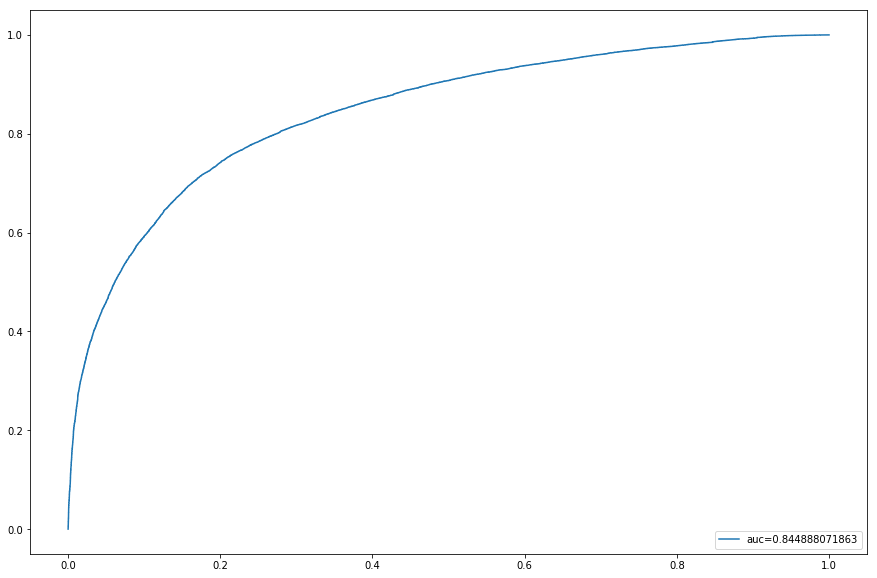

In [10]:
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)

# Choose a threshold value

In [11]:
threshold = .5
y_pred = (y_pred_proba > threshold).astype(int)

In [12]:
print('Accuracy Score:', metrics.accuracy_score(y, y_pred))
print('-'*50)
print('F1 Score:', metrics.f1_score(y, y_pred))
print('-'*50)
print('Precision:', metrics.precision_score(y, y_pred))
print('-'*50)
print('Recall:', metrics.recall_score(y, y_pred))
print('-'*50)
confusion_matrix = pd.DataFrame(
    metrics.confusion_matrix(y, y_pred),
    columns=['Predicted True', 'Predicted False'],
    index=['Actual True', 'Actual False']
)
confusion_matrix

Accuracy Score: 0.770228176837
--------------------------------------------------
F1 Score: 0.761059183952
--------------------------------------------------
Precision: 0.79269135401
--------------------------------------------------
Recall: 0.731854687383
--------------------------------------------------


,Predicted True,Predicted False
Actual True,21546,5100
Actual False,7145,19501


# Coefficient plot on scaled features Logistic Regression

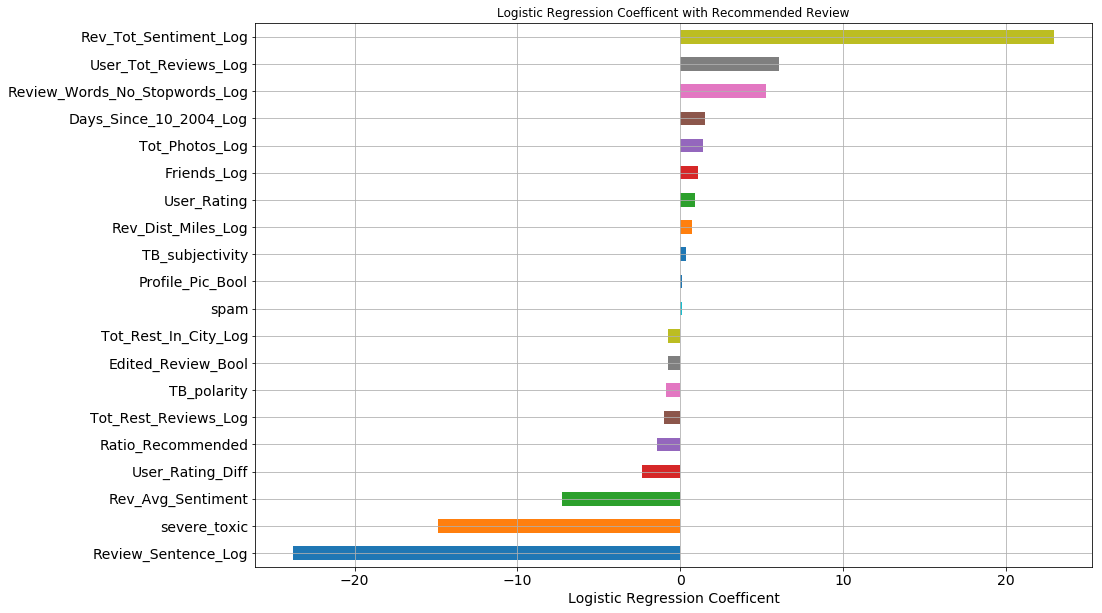

In [13]:
plt.figure(figsize = (15,10))
model.params[~model.params.index.isin(['Intercept'])].sort_values().plot(kind = 'barh', grid = 1, 
                                        title ='Logistic Regression Coefficent with Recommended Review')

plt.xlabel('Logistic Regression Coefficent', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()